# MSDM5003 Homework1 Part(b)
name: LIU Jingting

First, we import the libraries needed in the program.

In [1]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

We use `np.random.normal()` to generate samples of $X$ and $Y$, then compute the value of $Z$ by $Z=X+Y$. The generating process is wrapped as a function `gen_zsamples(num_samples, coef)` to make it convenience for us to generate samples with different numbers and coefficients.

In [3]:
def gen_samples(num_samples, coef):
    mean_x, var_x, mean_y, var_y = coef
    std_x = math.sqrt(var_x)
    std_y = math.sqrt(var_y)
    x = np.random.normal(mean_x, std_x, num_samples)
    y = np.random.normal(mean_y, std_y, num_samples)

    z = x + y   
    return x, y, z

Then we generate 5 groups of samples, with a number of 100, 1000, 10000, 100000, and 1000000, respectively. We then plot the value and frequency of $X$, $Y$, $Z$ using histograms as well as the theoretical curve of $Z\sim N(1, 3)$. In this way we can compare the accuracy over different number of samples. Each group corresponds to one 1$\times$3 plot, containing the distribution of $X$, $Y$, and $Z$, along with the theoretical curve of $Z$. To draw the distribution of $N(1,3)$ in _part(a)_, we select a number(here I select $10^6$) of $x$'s and use `scipy.stats.norm.pdf()` to compute the probability of $N(1,3)$ at each $x$, then by connecting those points in the xy-plane we obtain the theoretical curve of $Z$.

Another thing worth mentioning is about the choice of interval number and width. Theoretically speaking, the range of $X$ in a normal distribution is infinite, but according to the __3-$\sigma$ theorem__, we only need to focus on a small part of the interval. Let $xmin$, $xmax$ represent the smallest and largest value of our generalized $Z$ samples, then the range of the x-axis of histogram is selected as $[xmin, xmax]$. There are 30 matrices in each histogram, and the length of the interval is $\frac{xmax-xmin}{30}$.

In [4]:
xy_coef = (0, 1, 1, 2)                              # mean and variance of X and Y, as stated in Part(a)

mkdir ./plots/1726491390


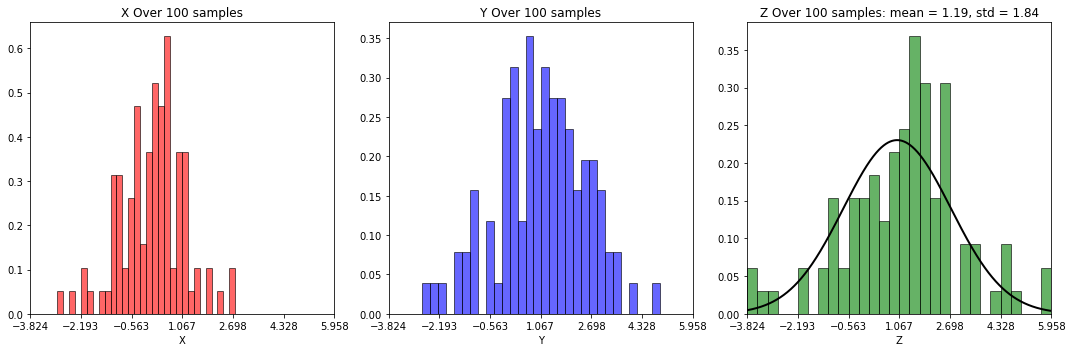

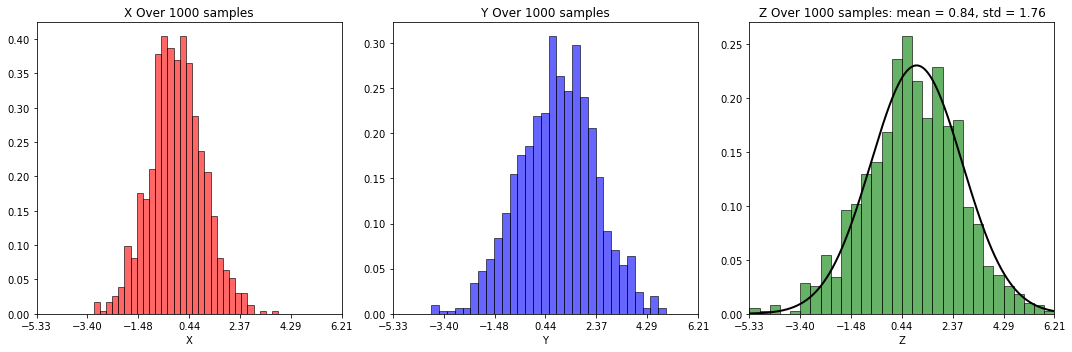

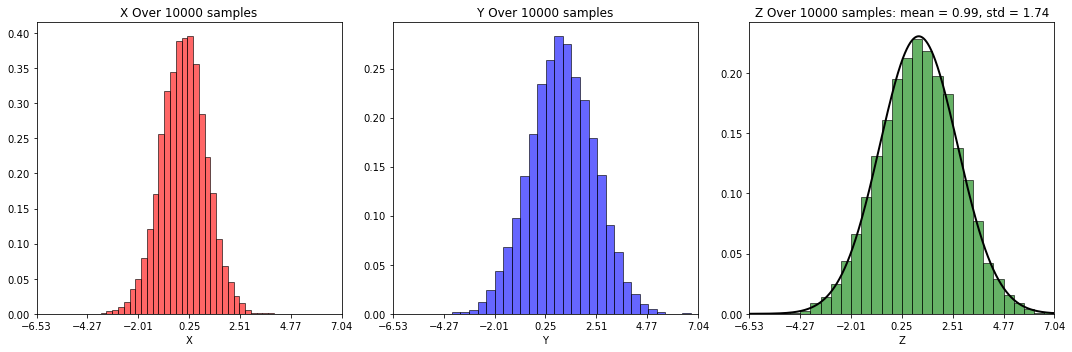

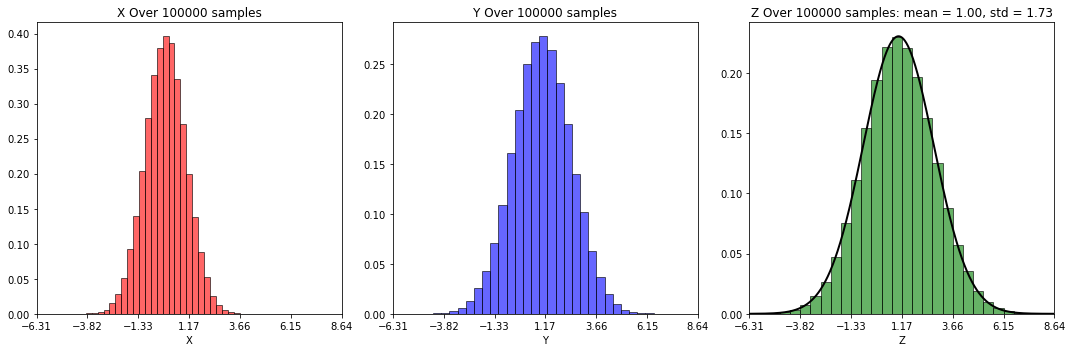

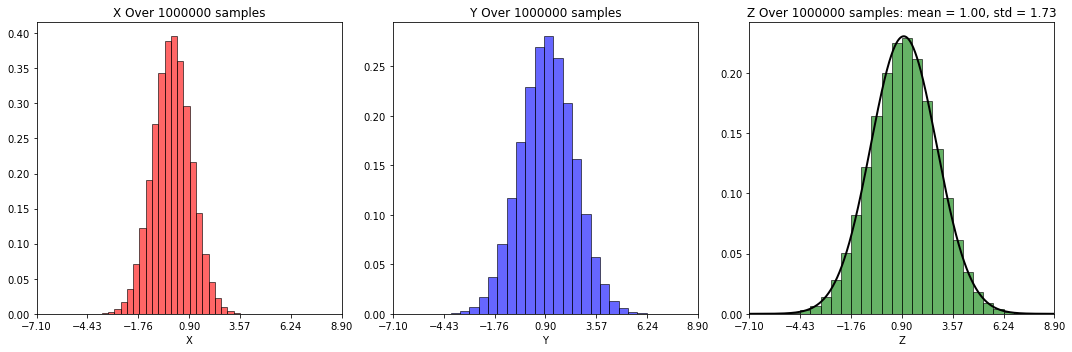

In [11]:
import os
import time

res_dir = './plots/' + str(int(time.time()))
if not os.path.exists(res_dir):                   # we will save our plots in 'plots' folder, named by timestamp to retain more than one group of plot
    print('mkdir ' + res_dir)
    os.makedirs(res_dir)

for num in [100, 1000, 10000, 100000, 1000000]:
    x, y, z = gen_samples(num, xy_coef)             # generate samples of X, Y, Z
    mu, sigma = norm.fit(z)                         # fitting
    xmin, xmax = min(z), max(z)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # use subplot to demonstrate
    
    # visualize X
    axs[0].hist(x, bins=30, density=True, alpha=0.6, color='r', edgecolor='black')
    axs[0].set_title("X Over {} samples".format(num))
    axs[0].set_xlim(xmin, xmax)
    axs[0].set_xlabel('X')
    xticks = np.arange(xmin, xmax + 1, (xmax - xmin) / 6)  # generate xticks
    axs[0].set_xticks(xticks)  
    
    # visualize Y
    axs[1].hist(y, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
    axs[1].set_title("Y Over {} samples".format(num))
    axs[1].set_xlim(xmin, xmax)
    axs[1].set_xlabel('Y')
    xticks = np.arange(xmin, xmax + 1, (xmax - xmin) / 6) 
    axs[1].set_xticks(xticks)
    
    # visualize Z
    points = np.linspace(xmin, xmax, 100000)           # plot the theoratical curve of Z
    prob = norm.pdf(points, 1, math.sqrt(3))
    axs[2].hist(z, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
    axs[2].plot(points, prob, 'k', linewidth=2)
    axs[2].set_title("Z Over %d samples: mean = %.2f, std = %.2f" % (num, mu, sigma))
    axs[2].set_xlim(xmin, xmax)
    axs[2].set_xlabel('Z')
    xticks = np.arange(xmin, xmax + 1, (xmax - xmin) / 6)  
    axs[2].set_xticks(xticks) 
    # plt.xticks(rotation='vertical')
    
    plt.tight_layout()
    plt.savefig(res_dir + "/XYZ_{}.png".format(num))
    plt.show()

After running the code for multiple times, we can see from the plots that the fitting result gets almost the same as theoretical result when the number of samples used reaches 100,000. The more samples we use, the more accurate the result is. Below shows one group of the running results.

| #samples | mean($\mu$) | std($\sigma$)|
|----------|----------|----------|
| 100 | 1.19 | 1.84 | 
| 1,000 | 0.84 | 1.76 |
| 10,000 | 0.99 | 1.74 |
| 100,000 | 1.00 | 1.73 |
| 1,000,000 | 1.00 | 1.73 |
| __Theoratical result__ | __1__ | __1.73__ |